In [1]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data=pd.read_csv(r"C:\Users\Dheeraj\Desktop\Python\exchange.csv")
print(data.head(5))
print(data.tail(5))
data.dtypes
data.info()
data.describe()

         Date  GBP/USD Close
0  1998-12-31          88.67
1  1999-01-01          88.67
2  1999-01-04          85.60
3  1999-01-05          83.95
4  1999-01-06          86.96
            Date  GBP/USD Close
5095  2018-07-12          48.59
5096  2018-07-13          48.56
5097  2018-07-16          48.56
5098  2018-07-17          48.08
5099  2018-07-18          47.40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 2 columns):
Date             5100 non-null object
GBP/USD Close    5100 non-null float64
dtypes: float64(1), object(1)
memory usage: 79.8+ KB


,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


In [3]:
data = pd.read_csv(r"C:\Users\Dheeraj\Desktop\Python\exchange.csv",index_col= 'Date')
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

DatetimeIndex(['1998-12-31', '1999-01-01', '1999-01-04', '1999-01-05',
               '1999-01-06', '1999-01-07', '1999-01-08', '1999-01-11',
               '1999-01-12', '1999-01-13',
               ...
               '2018-07-05', '2018-07-06', '2018-07-09', '2018-07-10',
               '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-16',
               '2018-07-17', '2018-07-18'],
              dtype='datetime64[ns]', name='Date', length=5100, freq=None)


,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96


In [4]:
data = data.sort_index()
data.head()

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96


Text(0, 0.5, 'Exchange rates')

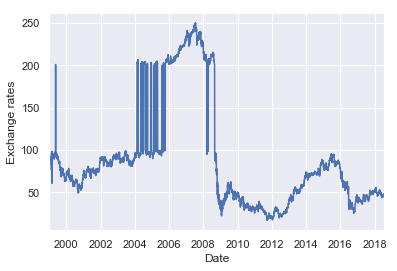

In [5]:
data['GBP/USD Close'].plot()
plt.ylabel("Exchange rates")

Text(0, 0.5, 'Weekly rate')

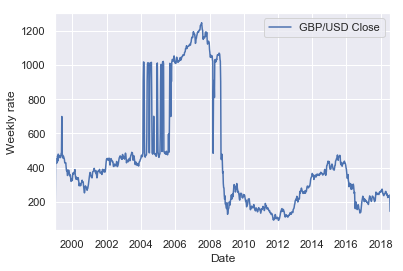

In [6]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly rate')

In [7]:
ts=data

            GBP/USD Close
Date                     
1998-12-31            NaN
1999-01-01            NaN
1999-01-04            NaN
1999-01-05            NaN
1999-01-06            NaN
1999-01-07            NaN
1999-01-08      85.620000
1999-01-11      83.957143
1999-01-12      83.210000
1999-01-13      83.332857
1999-01-14      83.902857
1999-01-15      84.144286
1999-01-18      84.962857
1999-01-19      85.744286
1999-01-20      86.980000
1999-01-21      87.600000
1999-01-22      88.061429
1999-01-25      88.180000
1999-01-26      88.240000
1999-01-27      88.445714
1999-01-28      89.047143
1999-01-29      89.904286
1999-02-01      90.065714
1999-02-02      89.211429
1999-02-03      88.620000
1999-02-04      88.014286
1999-02-05      87.230000
1999-02-08      86.614286
1999-02-09      85.955714
1999-02-10      85.580000
...                   ...
2018-06-07      45.335000
2018-06-08      45.631714
2018-06-11      46.156000
2018-06-12      46.567143
2018-06-13      46.849429
2018-06-14  

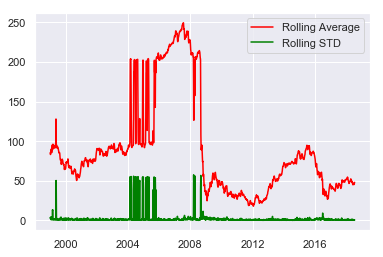

In [8]:
Rolling_avg = ts.rolling(window = 7, center= False).mean()
plt.plot(Rolling_avg, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')
Rolling_std = ts.rolling(window = 7, center= False).std()
plt.plot(Rolling_std, color = 'green', label = 'Rolling STD')
plt.legend(loc = 'best')
print(Rolling_avg,Rolling_std)

From the rolling statistics, we conclude that mean and variance is not constant. So the data is not stationary.

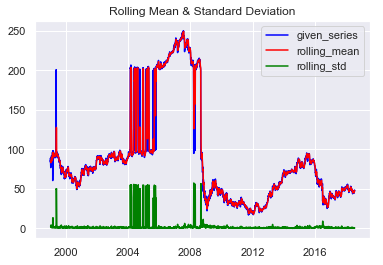

Results of Dickey-Fuller Test:
Test Statistic                   -1.967030
p-value                           0.301214
#Lags Used                       33.000000
Number of Observations Used    5066.000000
Critical Value (1%)              -3.431641
Critical Value (5%)              -2.862111
Critical Value (10%)             -2.567074
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data.iloc[:,0].values)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
  
test_for_stationary(ts)

Even the Dickey Fuller test proves the same,with p-values and test statistic. So the data is not stationary.

Transforming the data to eliminate trend

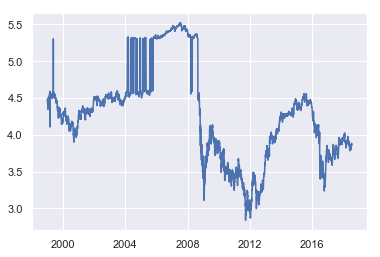

In [10]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

Smoothing by rolling Average

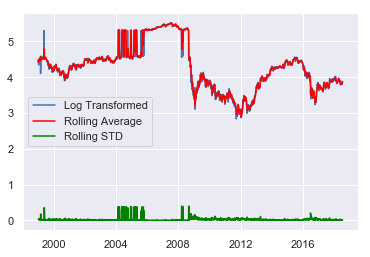

In [11]:
Roll_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Roll_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')
Roll_std = ts_logtransformed.rolling(window = 7, center= False).std()
plt.plot(Roll_std, color = 'green', label = 'Rolling STD')
plt.legend(loc = 'best')

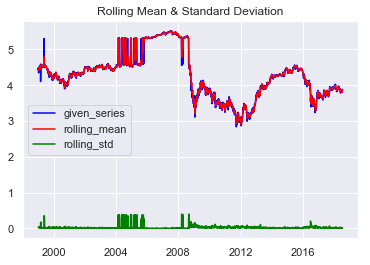

Results of Dickey-Fuller Test:
Test Statistic                   -1.682843
p-value                           0.439974
#Lags Used                       28.000000
Number of Observations Used    5071.000000
Critical Value (1%)              -3.431640
Critical Value (5%)              -2.862110
Critical Value (10%)             -2.567073
dtype: float64


In [12]:
test_for_stationary(ts_logtransformed)

Lets subtract this Rolling average from the original log transfomred series.

In [13]:
log_Rolling_difference = ts_logtransformed - Roll_average
log_Rolling_difference.head(10)

,GBP/USD Close
Date,
1998-12-31,NaN
1999-01-01,NaN
1999-01-04,NaN
1999-01-05,NaN
1999-01-06,NaN
1999-01-07,NaN
1999-01-08,-0.038308
1999-01-11,-0.085230
1999-01-12,0.003387


Replace NaN with 0 in above dataframe to avoid errors in the future

,GBP/USD Close
Date,
1999-01-08,-0.038308
1999-01-11,-0.085230
1999-01-12,0.003387
1999-01-13,0.037513
1999-01-14,0.047853
1999-01-15,0.053144
1999-01-18,0.045874
1999-01-19,0.025257
1999-01-20,-0.014844


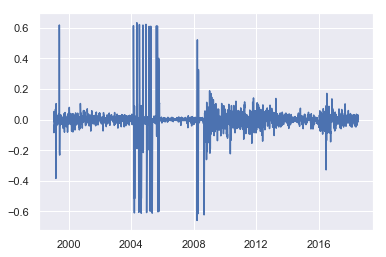

In [14]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)
log_Rolling_difference.head(10)

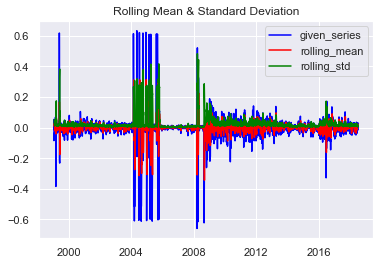

Results of Dickey-Fuller Test:
Test Statistic                -1.467231e+01
p-value                        3.252151e-27
#Lags Used                     3.000000e+01
Number of Observations Used    5.063000e+03
Critical Value (1%)           -3.431642e+00
Critical Value (5%)           -2.862111e+00
Critical Value (10%)          -2.567074e+00
dtype: float64


In [15]:
test_for_stationary(log_Rolling_difference)

Still the Dickey Fuller test remains same, with p-values and test statistic. So the data is not stationary.

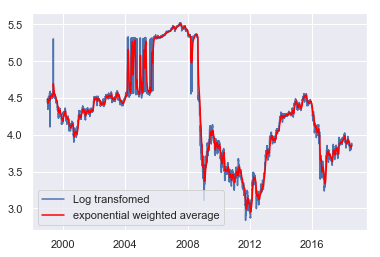

In [16]:
expwtdaverageLogdata=ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwtdaverageLogdata, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

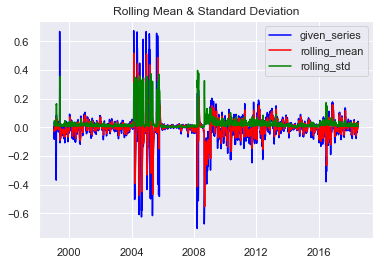

Results of Dickey-Fuller Test:
Test Statistic                -1.150741e+01
p-value                        4.342009e-21
#Lags Used                     2.800000e+01
Number of Observations Used    5.071000e+03
Critical Value (1%)           -3.431640e+00
Critical Value (5%)           -2.862110e+00
Critical Value (10%)          -2.567073e+00
dtype: float64


In [17]:
log_expwtdavg_differnce=ts_logtransformed-expwtdaverageLogdata
test_for_stationary(log_expwtdavg_differnce)

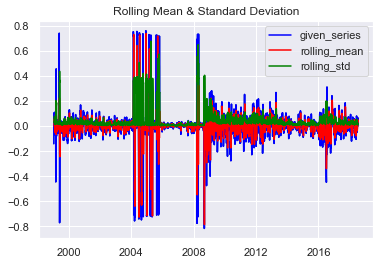

Results of Dickey-Fuller Test:
Test Statistic                -1.402058e+01
p-value                        3.577483e-26
#Lags Used                     3.300000e+01
Number of Observations Used    5.059000e+03
Critical Value (1%)           -3.431643e+00
Critical Value (5%)           -2.862111e+00
Critical Value (10%)          -2.567074e+00
dtype: float64


In [18]:
datasetlogdiffshift=ts_logtransformed-ts_logtransformed.shift(7)
datasetlogdiffshift.dropna(inplace=True)
plt.plot(datasetlogdiffshift)
test_for_stationary(datasetlogdiffshift)

In [19]:
# from sklearn.model_selection import train_test_split
# xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)
#insert where necessary

<Figure size 432x288 with 0 Axes>

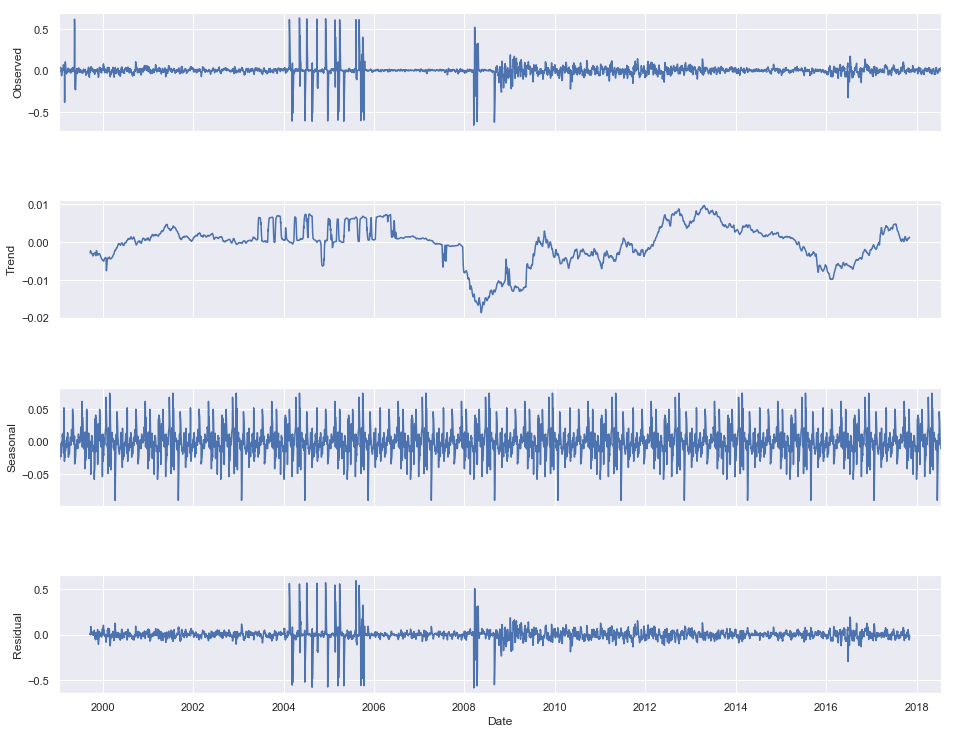

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(log_Rolling_difference['GBP/USD Close'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

<Figure size 432x288 with 0 Axes>

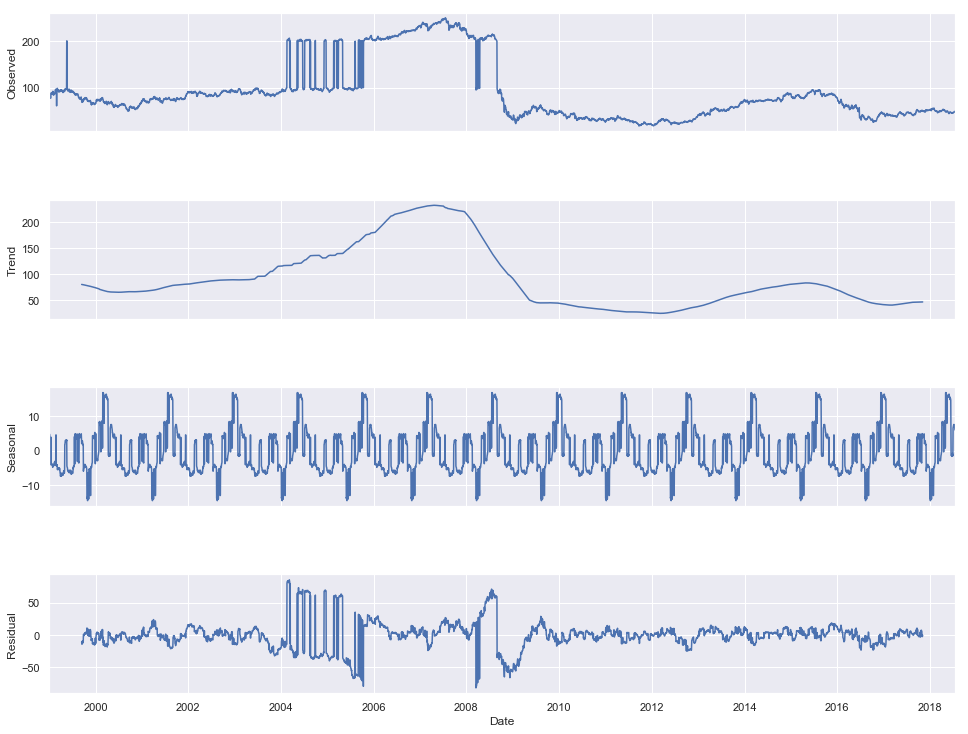

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['GBP/USD Close'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

create stacked line plots

In [22]:
# from pandas import Series
# from pandas import DataFrame
# from pandas import TimeGrouper
# from matplotlib import pyplot
# series = Series.from_csv(r"\\toaster\homes\d\h\dheerajk\nt\AccountSettings\Desktop\Dheeraj\exchange.csv", header=0)
# series.plot.area()
# groups = series.groupby(TimeGrouper('A'))
# years = DataFrame()
# for name, group in groups:
#     years[name.year] = group.values
# years.plot(subplots=True, legend=False)
# pyplot.show()

<Figure size 432x288 with 0 Axes>

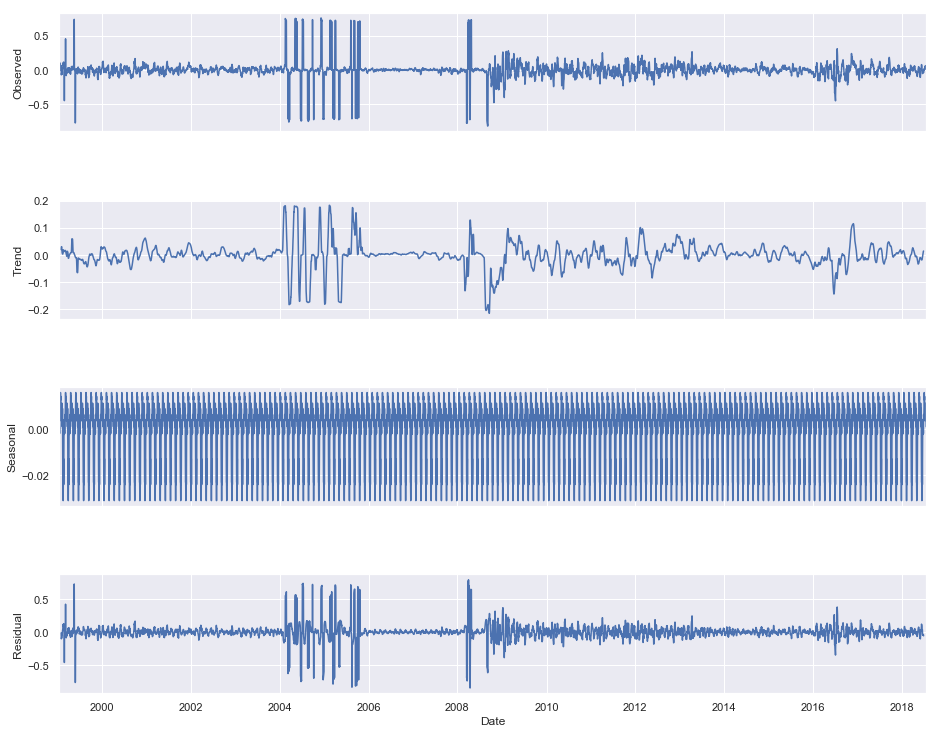

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(datasetlogdiffshift['GBP/USD Close'], model='additive', freq=30)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

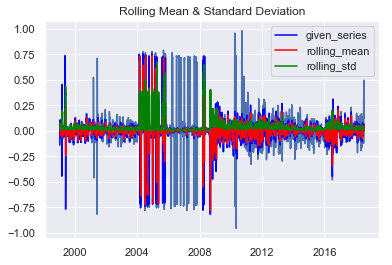

Results of Dickey-Fuller Test:
Test Statistic                -1.402058e+01
p-value                        3.577483e-26
#Lags Used                     3.300000e+01
Number of Observations Used    5.059000e+03
Critical Value (1%)           -3.431643e+00
Critical Value (5%)           -2.862111e+00
Critical Value (10%)          -2.567074e+00
dtype: float64


In [ ]:
datasetlogdiffshift2=datasetlogdiffshift-datasetlogdiffshift.shift(530)
datasetlogdiffshift.dropna(inplace=True)
plt.plot(datasetlogdiffshift2)
test_for_stationary(datasetlogdiffshift)

In [ ]:
#ACF and PACF plots:
lag_acf = acf(log_Rolling_difference, nlags=30)
lag_pacf = pacf(log_Rolling_difference, nlags=50, method='ols')
from statsmodels.tsa.stattools import acf, pacf

Text(0.5, 1.0, 'Autocorrelation Function')

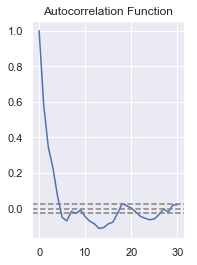

In [ ]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_Rolling_difference)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_Rolling_difference)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

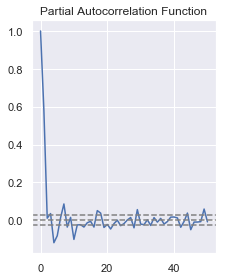

In [ ]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_Rolling_difference)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_Rolling_difference)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

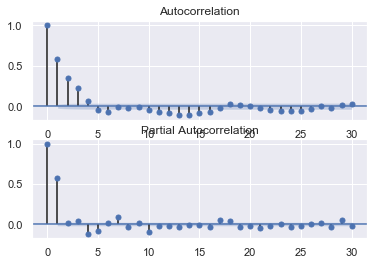

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(log_Rolling_difference, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(log_Rolling_difference, ax=pyplot.gca(), lags=30)
pyplot.show()
plt.rcParams["figure.figsize"] = (10,10)


import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(log_Rolling_difference, p_values, d_values, q_values):
    log_Rolling_difference = log_Rolling_difference.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(log_Rolling_difference, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = req_data
# evaluate parameters
p_values = [2,3,6,8,9]
d_values = range(0, 2)
q_values = range(4, 9)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

In [ ]:
req_data=data.iloc[4436:5101,:]
req_data.head(5)

,GBP/USD Close
Date,
2016-01-01,77.14
2016-01-04,75.69
2016-01-05,74.57
2016-01-06,73.28
2016-01-07,71.88


In [ ]:
req_data.tail(5)

,GBP/USD Close
Date,
2018-07-12,48.59
2018-07-13,48.56
2018-07-16,48.56
2018-07-17,48.08
2018-07-18,47.40


In [ ]:
# grid search sarima hyperparameters for exchange rates
from math import sqrt
from multiprocessing import cpu_count
from sklearn.externals.joblib import Parallel, delayed
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv
 
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores
    print(score)
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
    models = list()
    # define config lists
    p_params = range(2,6)
    d_params = [0, 1, 2]
    q_params = [4, 7, 9, 18, 20]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models
 
if __name__ == '__main__':
    # load dataset
    series = req_data
    data = series.values
    print(data.shape)
    # data split
    n_test = 1000
    # model configs
    cfg_list = sarima_configs(seasonal=[0,6,12])
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

(664, 1)


from math import sqrt
from multiprocessing import cpu_count
from sklearn.externals.joblib import Parallel, delayed
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv
from fbprophet import Prophet
m = Prophet()

m.fit(ph_df)
fig2 = m.plot_components(forecast)
plt.show()